## Pendahuluan

Dataset games.csv memuat data penjualan game berdasarkan platform dari berbagai wilayah yang berbeda, pada dataset <br>
terdapat beberapa kolom seperti kolom Name, Platform, Year_of_Release, Genre, NA_sales, JP_sales, dan EU_sales<br>
sebagai data analyst kita perlu mempelajari dataset tersebut, misalnya jumlah penjualan per tahun, karakteristik game di tiap<br>
wilayah yang berbeda sebagai data acuan untuk membuat kampanye game untuk tahun 2017.

## Tujuan 

Tujuan kita melaksanakan proyek ini adalah untuk mempelajari dataset dan melakukan 2 test hipotesis yaitu: <br>
    1. Rata rata rating pengguna platform Xbox One dan PC sama <br>
    2. Rata rata rating pengguna genre Action dan Sports berbeda

##  Pra-pemrosesan Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### Memuat Data

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Mengeksplorasi Data Awal

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Mengecek ukuran data
len(df)

16715

In [5]:
# Mengecek informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [9]:
print(df['Genre'].unique())
print(df['Critic_Score'].unique())
print(df['User_Score'].unique())
print(df['Rating'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '

**Deskripsi Data:**<br>
    - `Name` nama game<br>
    - `Platform` Nama platform game yang dapat dimainkan<br>
    - `Year_of_Release`Tahun rilis<br>
    - `Genre` Jenis game<br>
    - `NA_sales` penjualan di amerika utara dalam satuan juta USD<br>
    - `EU_sales` penjualan di europe dalam satuan juta USD<br>
    - `JP_sales` penjualan di jepang dalam satuan juta USD<br>
    - `Other_sales` penjualan di negara lainnya dalam satuan juta USD<br>
    - `Critic_Score` skor ulasan dari kritikus maksimal 100<br>
    - `User_Score` skor ulasan dari user, maksimal 10<br>
    - `Rating` Entertaiment Software Rating Board<br>
    

**Kesimpulan sementara:** <br>
    - kolom `Year_of_Release` seharusnya bertipe data integer karena tahun rilis merupakan bilangan bulat<br>
    - Nama kolom seharusnya huruf kecil<br>
    - Terdapat nilai yang hilang pada kolom `Name`,`Year_of_Release`,`Critic_Score`,`User_Score`,`Rating`<br>
    - Tidak ada data yang terduplikat
    - Terdapat value yang aneh pada kolom `User_Score` yaitu 'tbd'

In [10]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Kesimpulan Sementara:** <br>
    - Terdapat nilai yang tidak wajar pada kolom sales pada min dan 25% terdapat nilai 0.00 sehingga perlu dilakukan analisis lebih lanjut

### Memperbaiki Judul

In [11]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
df = df.rename(columns = str.lower)

In [13]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Kesimpulan Sementara** <br>
Berdasarkan hasil diatas dapat kita lihat bahwa nama setiap kolom telah diterapkan fungsi str.lower, sehingga setiap kolom <br>
hanya memuat huruf kecil.

### Mengatasi Nilai yang hilang


In [14]:
df.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [15]:
# Membuat fungsi untuk menghitung persentase data yang hilang
for col in df.columns:
    missing = df[col].isnull().sum()
    total = df[col].shape[0]
    percentage = (missing/total)*100
    print(f"kolom {col}: {percentage:.2f}% nilai yang hilang.")
    

kolom name: 0.01% nilai yang hilang.
kolom platform: 0.00% nilai yang hilang.
kolom year_of_release: 1.61% nilai yang hilang.
kolom genre: 0.01% nilai yang hilang.
kolom na_sales: 0.00% nilai yang hilang.
kolom eu_sales: 0.00% nilai yang hilang.
kolom jp_sales: 0.00% nilai yang hilang.
kolom other_sales: 0.00% nilai yang hilang.
kolom critic_score: 51.32% nilai yang hilang.
kolom user_score: 40.09% nilai yang hilang.
kolom rating: 40.48% nilai yang hilang.


**Kesimpulan Sementara**

Pada kasus ini kita akan men drop nilai yang hilang yang jumlah nya tidak banyak (Sekitar 0-10%), namun untuk <br>
kolom year_of_release nilai yang hilang akan diganti dengan median.

In [16]:
df.dropna(subset =['name','genre'], inplace=True)

In [17]:
#Mengecek nilai yang hilang pada kolom name 
df['name'].isna().sum()


0

In [18]:
#Mengecek nilai yang hilang pada kolom genre
df['genre'].isna().sum()

0

In [19]:
# Mengganti nilai yang hilang pada kolom years_of_release dengan median
median_release_platform = df.groupby('platform')['year_of_release'].median()
print(median_release_platform)

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64


In [20]:
#Mengganti nilai yang hilang tiap platform dengan median sesuai platform
df['year_of_release'] = df.apply(lambda x: median_release_platform[x.platform] if
                                pd.isna(x.year_of_release)else x.year_of_release, axis=1)

In [21]:
df['year_of_release'].isna().sum()

0

**Kesimpulan Sementara** <br>
Nilai yang hilang pada kolom year_of_release telah digantikan dengan nilai median, sehingga dapat kita lihat <br>
pada kolom `year_of_release` sudah tidak ada nilai yang hilang atau bernilai 0

### Mengubah Tipe Data

In [22]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [23]:
df['year_of_release'].dtypes

dtype('int64')

In [24]:
df['user_score'].dtypes

dtype('O')

In [25]:
df['critic_score'].dtypes

dtype('float64')

In [26]:
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

In [27]:
df['year_of_release'].isna().sum()

0

In [28]:
df.isna().sum().sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Kesimpulan Sementara :**<br>
    - kolom `name`,`year_of_release` dan `genre` sudah diperbaiki<br>
    - Masih terdapat nilai yang hilang pada kolom `critic_score` , `rating` dan `user_score`

**Mengecek Pola Nilai yang hilang**

In [29]:
df['user_score'].isnull().astype(int).groupby(df['genre']).sum().sort_values(ascending=False)

genre
Action          1163
Misc             862
Adventure        844
Sports           832
Role-Playing     725
Fighting         411
Racing           375
Strategy         333
Platform         321
Shooter          300
Simulation       292
Puzzle           241
Name: user_score, dtype: int64

**Kesimpulan Sementara**<br>
penilaian user atau score_user yang paling banyak memiliki nilai yang hilang adalah game yang<br>
ber genre Action sebanyak 1163, diikuti dengan Misc sebanyak 862, Adventure 844, dan seterusnya sampai<br>
yang paling sedikit adalah genre Puzzle

In [30]:
df['rating'] = df['rating'].fillna('unknown')

In [31]:
df['rating'].isna().sum()

0

In [32]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

In [33]:
sales_area = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

In [34]:
df['total_sales'] = df[sales_area].sum(axis=1)

In [35]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Kesimpulan Sementara** <br>
Nilai yang hilang pada kolom rating telah diisi dengan value 'unknown' karena rating untuk game tersebut tidak diketahui<br>
Kolom total_sales telah ditambahkan untuk melihat total penjualan dari berbagai wilayah untuk masing-masing game

## Analisis Data Eksploratif (EDA)

### Mengecek data yang sudah bersih

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.2+ MB


In [37]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,16713.000000
mean,2006.474960,0.263302,0.145045,0.077625,0.047343,68.967679,0.533315
std,5.896089,0.813565,0.503359,0.308871,0.186742,13.938165,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,82.540000


**Kesimpulan Sementara** <br>
- nilai min 0 menandakan ada beberapa game yang tidak laku terjual atau belum terjual<br>
- Pada kuartil Q1 (25%) penjualan na_sales eu_sales dan jp_sales bernilai 0<br>
- Pada Q2 (50%) penjualan pada jp_sales bernilai 0<br>

### Mempelajari Parameter Inti

Berikut merupakan beberapa parameter inti dari dataframe:<br>
    - Jenis Platform <br>
    - Tahun Rilis <br>
    - Genre Game <br>
    - Total Sales

Berikut beberapa pertanyaan untuk menganalisis data:<br>
    - Berapa banyak game yang rilis di tahun berbeda <br>
    - Platform apa saja yang memiliki penjualan terbesar <br>
    - Genre apa yang paling banyak <br>

In [38]:
game_per_year = df.groupby('year_of_release')['name'].count().sort_values()
game_per_year

year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1991      41
1992      43
1981      46
1982      53
1993      60
1994     121
1995     219
1996     263
1997     290
1999     341
2000     350
1998     386
2001     482
2016     502
2013     552
2014     582
2015     606
2012     653
2004     783
2003     800
2002     829
2005     973
2006    1006
2011    1161
2007    1197
2010    1302
2008    1457
2009    1476
Name: name, dtype: int64

**Kesimpulan Sementara** <br>
Game yang dirilis paling sedikit pada tahun 1980 dan meningkat setiap tahun nya sampai tahun 2009 yang paling banyak <br>
sebanyak 1476 total game yang telah dirilis

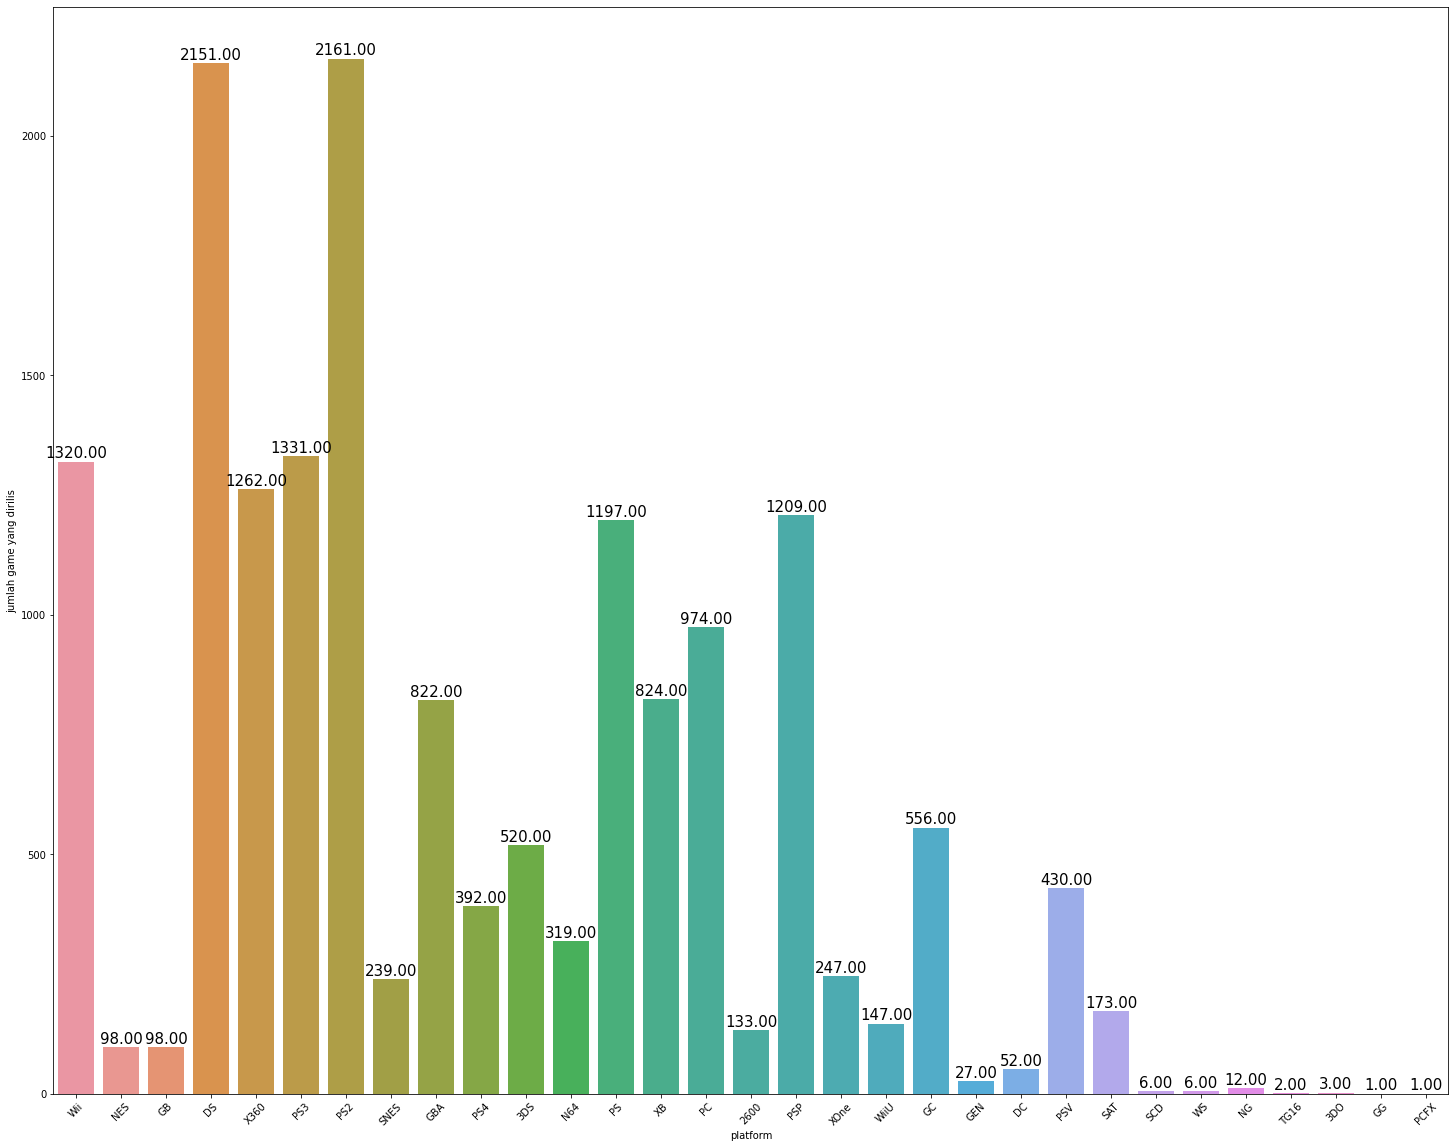

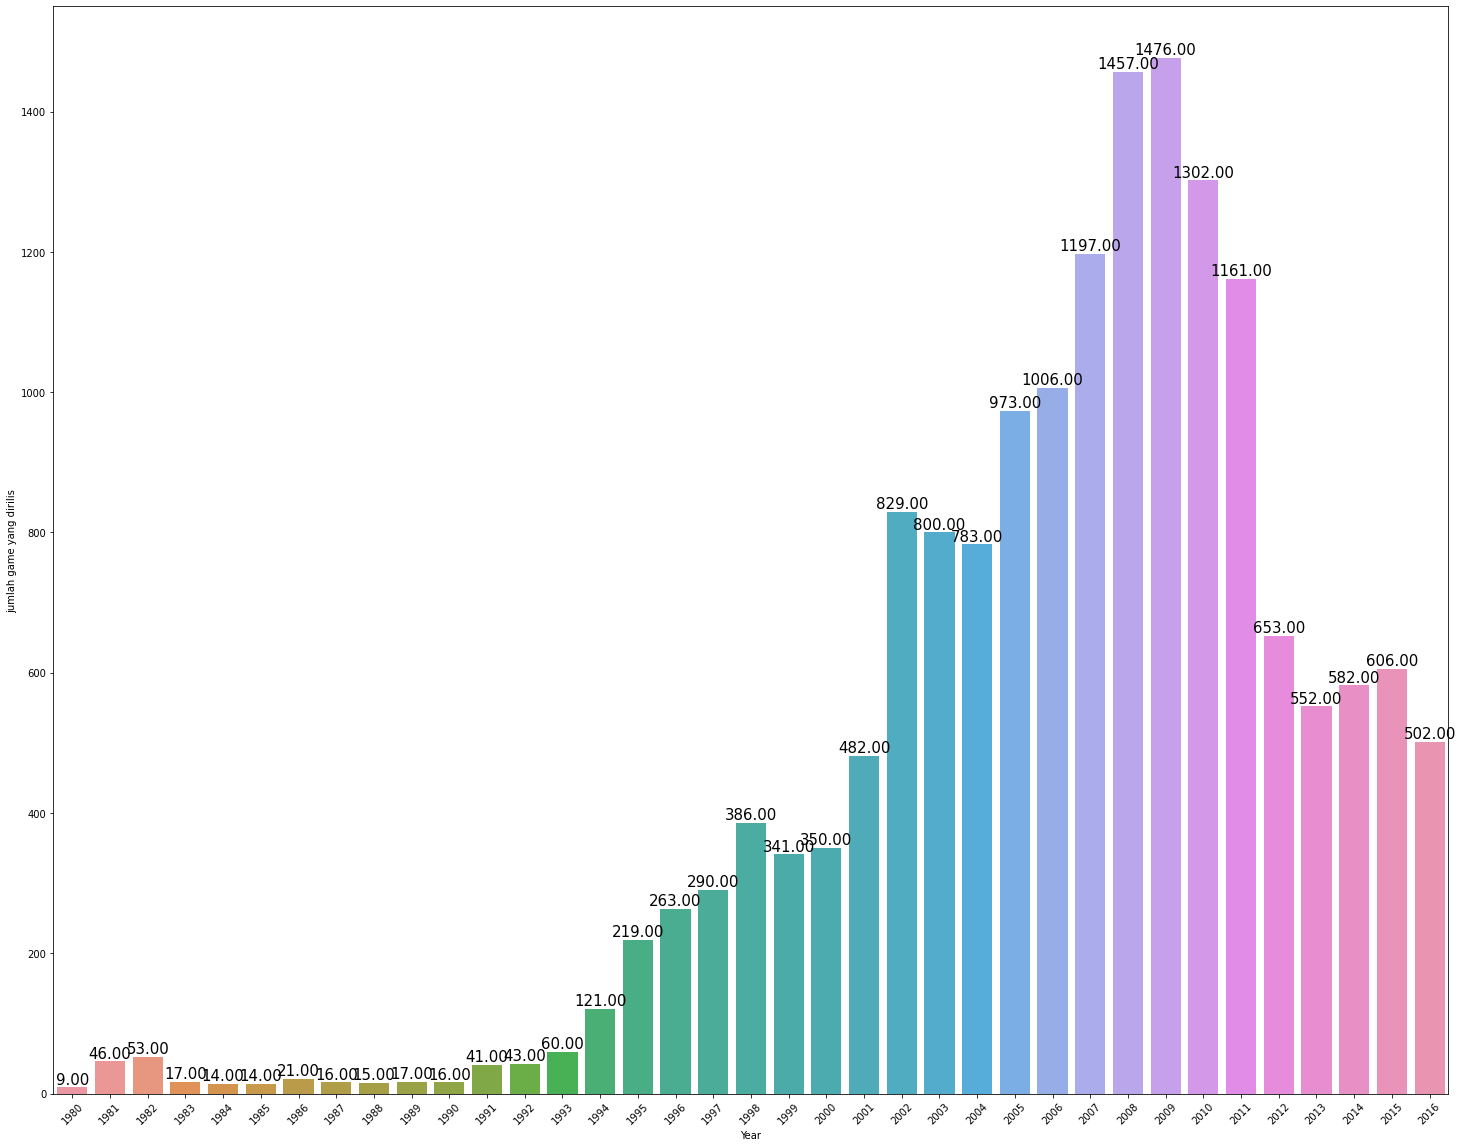

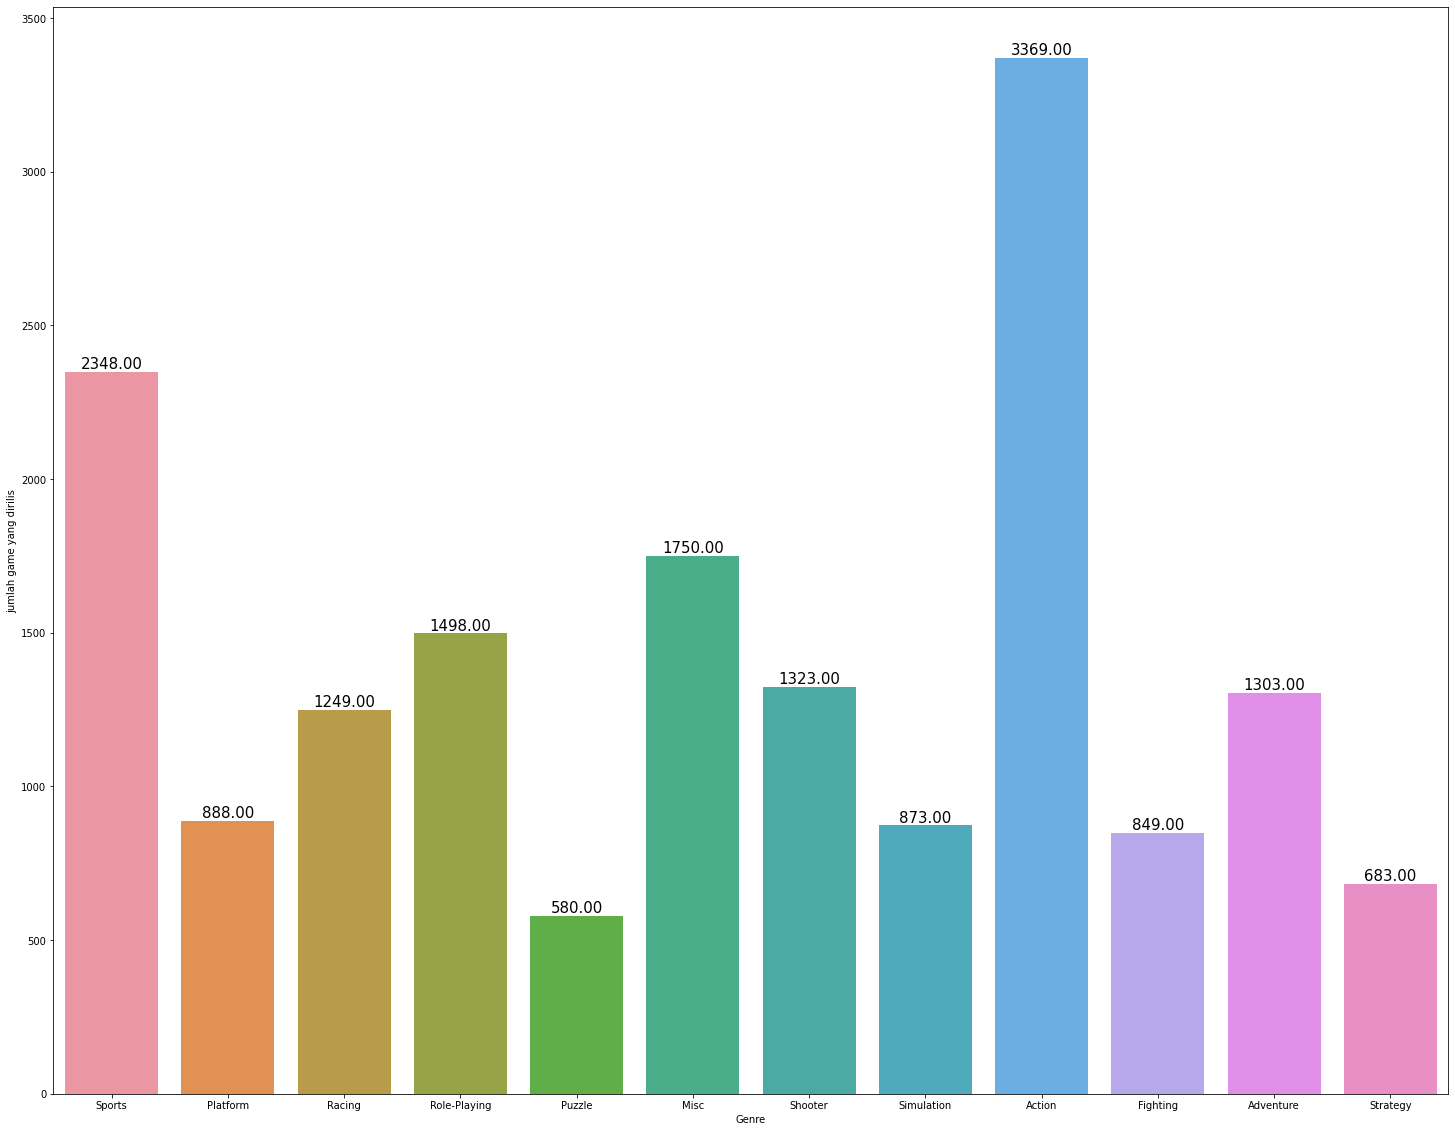

In [39]:
#Membuat barplot dengan anotasi untuk tiap platform
plt.figure(figsize=(25,20))
plot = sns.countplot(x='platform', data=df)
for g in plot.patches:
    plot.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.xlabel('platform')
plt.xticks(rotation=45)
plt.ylabel('jumlah game yang dirilis')
plt.show()
# Membuat barplot dengan anotasi untuk tiap year relase
plt.figure(figsize=(25,20))
plot = sns.countplot(x='year_of_release',data=df)
for g in plot.patches:
    plot.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('jumlah game yang dirilis')
plt.show
#
plt.figure(figsize=(25,20))
plot = sns.countplot(x='genre', data=df)
for g in plot.patches:
    plot.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.xlabel('Genre')
plt.ylabel('jumlah game yang dirilis')
plt.show()

**Kesimpulan Sementara** <br>
Game yang dirilis paling banyak pertama ada pada platform PS2 sebanyak 2161 game <br>
Game yang dirilis paling banyak kedua ada pada platform DS sebanyak 2151 game <br>
Game yang dirilis paling banyak ketiga ada pada platform PS3 sebanyak 1331 game <br>
Game yang dirilis paling banyak keempat ada pada platform Wii sebanyak 1320 game <br>
Game yang dirilis paling banyak kelima ada pada platform X360 sebanyak 1262 game <br>
Game yang paling banyak pertama dirilis ada pada tahun 2009 sebanyak 1476 game<br>
Game yang paling banyak kedua dirilis pada tahun 2008 sebanyak 1467 game <br>
Game yang paling banyak ketiga dirilis pada tahun 2010 sebanyak 1302 game <br>
Game yang paling banyak keempat dirilis pada tahun 2007 sebanyak 1197 game <br>
Game yang paling banyak kelima dirilis pada tahun 2011 sebanyak 1161 game <br>
Game dengan genre terbanyak pertama ada pada game dengan Genre Action sebanyak 3369 game <br>
Game dengan genre terbanyak kedua ada pada game dengan Genre Sports sebanyak 2348 game <br>
Game dengan genre terbanyak ketiga ada pada game dengan Genre Misc sebanyak 1750 game <br>
Game dengan genre terbanyak keempat ada pada game dengan Genre Role-Playing sebanyak 1498 game <br>
Game dengan genre terbanyak kelima ada pada game dengan Genre Shooter sebanyak 1323 game <br>



In [40]:
total_sales_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).reset_index()
total_sales_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


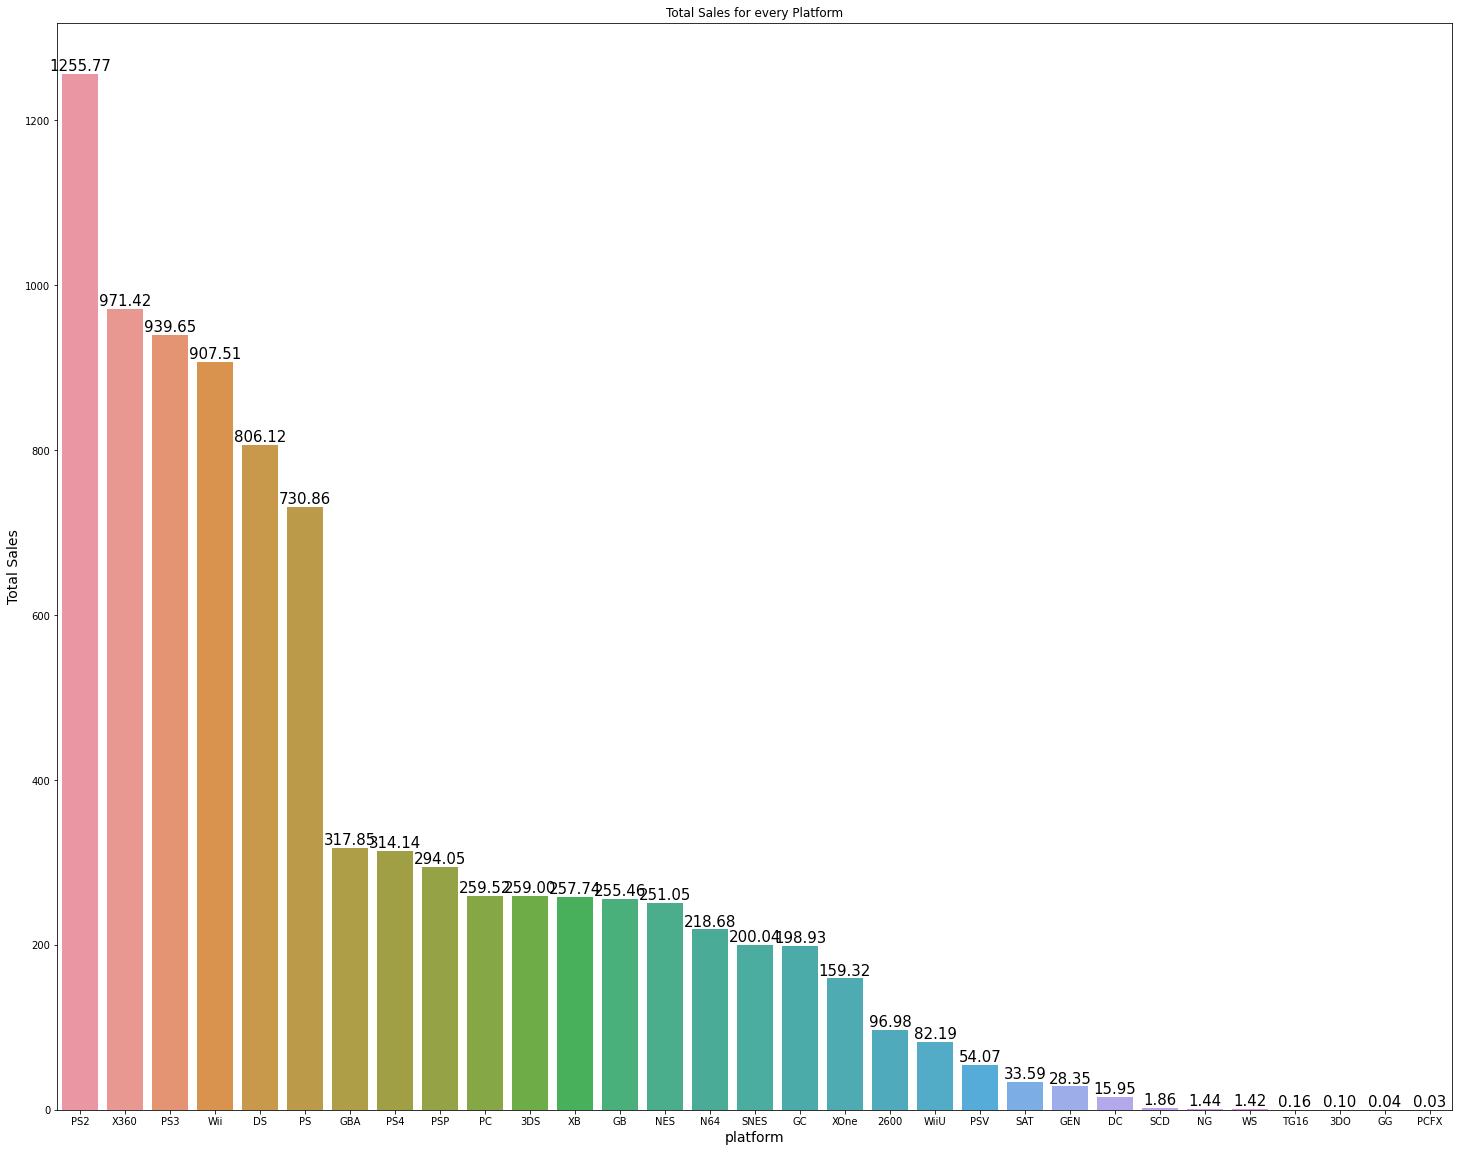

In [41]:
plt.figure(figsize=(25,20))
plots = sns.barplot(x="platform", y="total_sales", data= total_sales_platform)

for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.xlabel("platform", size = 14)
plt.ylabel("Total Sales", size = 14)
plt.title("Total Sales for every Platform")
plt.show()
        

**Kesimpulan Sementara** <br>
- Jumlah rilis game per tahun bervariasi mulai dari 9 game pada tahun 1980 sampai dengan sebanyak 1476 game pada tahun 2009 <br>
- Penjualan terbanyak ada pada platform PS2, urutan ke 2 ada pada platform Xbox 360, dan urutan ke 3 ada pada platform PS3 <br>


In [42]:
df['genre'].value_counts().sort_values(ascending=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [43]:
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [44]:
df['user_score'] = df['user_score'].astype(float)

In [45]:
df['user_score'].dtypes

dtype('float64')

In [46]:
df['critic_score'].dtypes

dtype('float64')

**Kesimpulan Sementara** <br>
- 5 Game yang paling banyak adalah game yang ber-genre Action, Sports, Misc, Role-Playing, dan Shooter

In [47]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [48]:
ps2 = df.query('platform in("PS2")')
ps2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [49]:
ps2.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,year_of_release,total_sales
4,2004,211.81
2,2002,205.38
3,2003,184.31
5,2005,182.87
1,2001,166.43
6,2006,103.42
7,2007,75.99
8,2008,53.90
0,2000,39.17
9,2009,26.40


**Kesimpulan Sementara**<br>
 - Penjualan PS2 terbanyak di tahun 2004 sebanyak 211.81 juta dollar
 - Penjualan PS2 terbanyak kedua di tahun 2002 sebanyak 205.38 juta dollar
 - Penjualan PS2 terbanyak ketiga di tahun 2003 sebanyak 184.31 juta dollar

In [50]:
ps3 = df.query('platform in("PS3")')
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [51]:
ps3.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

,year_of_release,total_sales
5,2011,165.09
4,2010,142.17
3,2009,130.93
2,2008,118.52
7,2013,113.25
6,2012,107.36
1,2007,73.19
8,2014,47.76
0,2006,20.96
9,2015,16.82


**Kesimpulan untuk PS3**<br>
 - Penjualan terbanyak untuk PS3 di tahun 2011 sebanyak 165.09 juta dollar
 - Penjualan terbanyak ke 2 untuk PS3 di tahun 2010 sebanyak 142.17 juta dollar
 - Penjualan terbanyak ke 3 untuk PS3 di tahun 2009 sebanyak 130.93 juta dollar

In [52]:
x360 = df.query('platform in("X360")')
x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01


In [53]:
x360.groupby('year_of_release')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

,year_of_release,total_sales
5,2010,180.21
6,2011,143.84
3,2008,135.26
4,2009,120.29
7,2012,99.74
2,2007,95.41
8,2013,88.58
1,2006,51.62
9,2014,34.74
10,2015,11.96


**Kesimpulan untuk XBOX 360** <br>
 - Penjualan terbanyak untuk XBOX 360 terbanyak pada tahun 2010 sebanyak 180.21 juta dollar
 - Penjualan terbanyak untuk XBOX 360 terbanyak ke 2 pada tahun 2011 sebanyak 143.84 juta dollar
 - Penjualan terbanyak untuk XBOX 360 terbanyak ke 3 pada tahun 2008 sebanyak 135.26 juta dollar

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

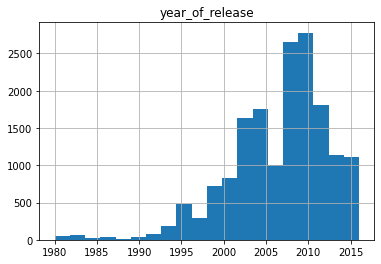

In [54]:
df.hist('year_of_release', bins=20)

In [55]:
def sales_per_platform(data, platform):
    df_filter = data[data['platform']==platform]
    df_filter.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')

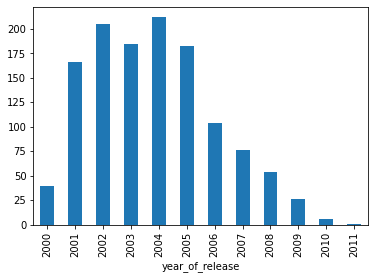

In [56]:
sales_per_platform(df,'PS2')

Penjualan PS2 tertinggi pada tahun 2004 dan mengalami penurunan drastis pada tahun 2011

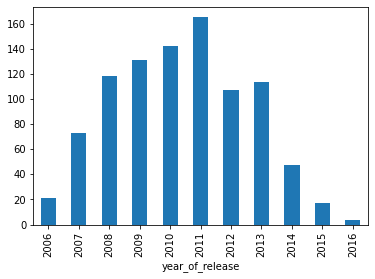

In [57]:
sales_per_platform(df,'PS3')

Penjualan PS3 tertinggi pada tahun 2011 dan mengalami penurunan drastis pada tahun 2016

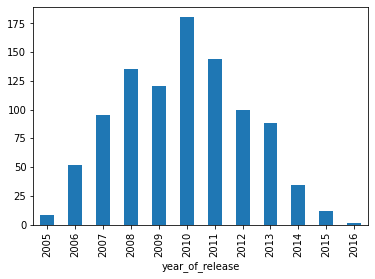

In [58]:
sales_per_platform(df,'X360')

Penjualan xbox 360 tertinggi pada tahun 2010 dan mengalami penurunan drastis pada tahun 2016

**Data Acuan untuk Kampanye 2017**<br>
Berdasarkan data histogram saya mengambil data 5 tahun ke belakang dari tahun 2017 yaitu tahun 2012<br>
berdasarkan histogram dari 2011 ke 2012 ada sedikit penurunan yang tidak terlalu signifikan atau cenderung stagnan<br>
oleh karena itu saya mengambil acuan data dari tahun 2011 sebagai acuan

In [59]:
df_final = df[df['year_of_release']>= 2011]

<AxesSubplot:xlabel='platform'>

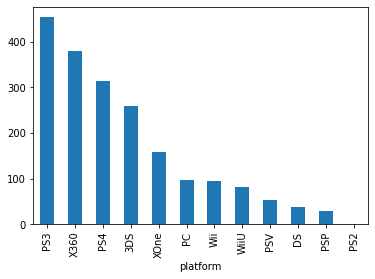

In [60]:
#Penjualan per platform
df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

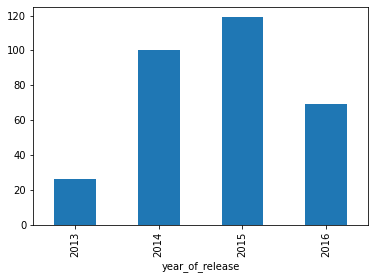

In [61]:
sales_per_platform(df_final, 'PS4')

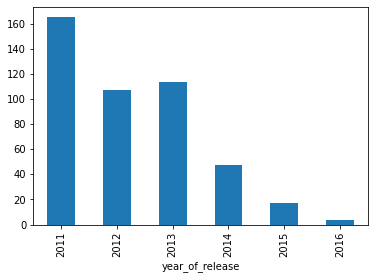

In [62]:
sales_per_platform(df_final,'PS3')

In [63]:
df_top_platform = df_final[df_final['platform'].isin(['PS4','PS3','X360','3DS','XOne'])]
df_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

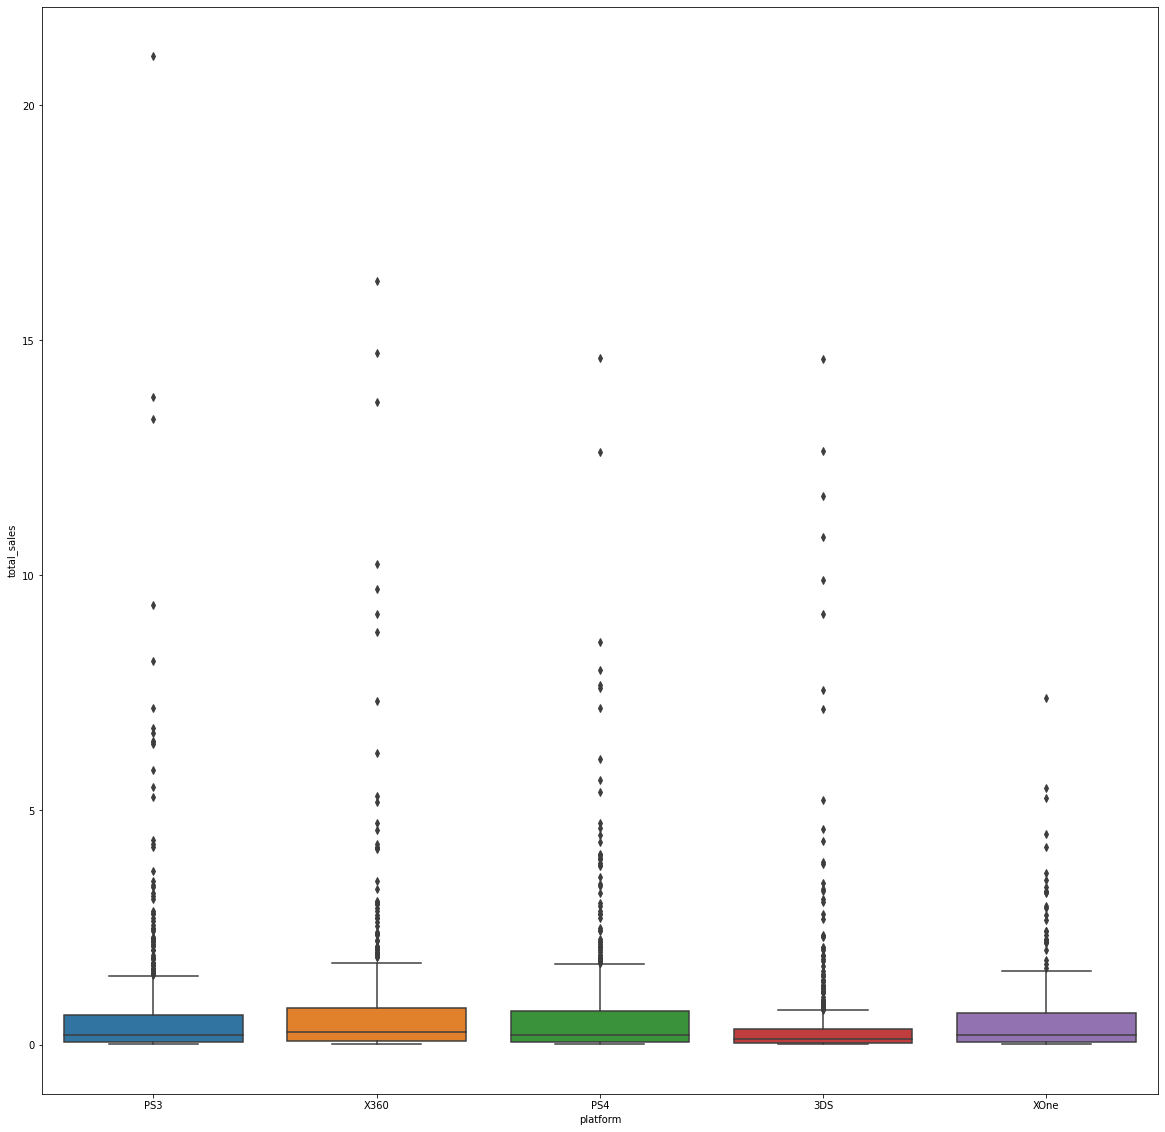

In [64]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df_top_platform, x='platform',y='total_sales')

**Kesimpulan Sementara**<br>
Berdasarkan boxplot perbedaan penjualan rata rata top 5 platform dari PS3 X360 PS4 3DS dan XOne <br> 
tidak terlalu signifikan atau hampir sama


In [65]:
#Membuat pivot table untuk mengecek median dan mean total_sales per platform
df_top_platform.pivot_table(index='platform', values='total_sales', aggfunc=['median','mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,0.12,0.498077
PS3,0.21,0.619209
PS4,0.20,0.801378
X360,0.27,0.763815
XOne,0.22,0.645020


**Kesimpulan Sementara** <br>
Berdasarkan pivot table mean total sales terbanyak ada pada PS4 dan terendah ada pada 3DS<br>
Sementara untuk median tertinggi ada pada platform X360 dan terendah pada 3DS

In [66]:
ps3 = df_final[df_final['platform']=='PS3']
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

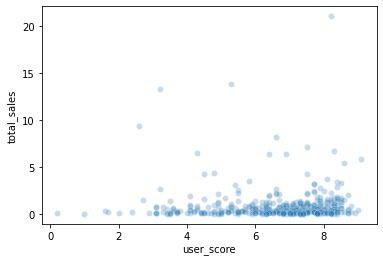

In [67]:
sns.scatterplot(data=ps3, x='user_score',y='total_sales',alpha=.25)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

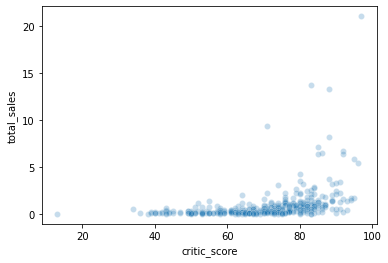

In [68]:
sns.scatterplot(data=ps3, x='critic_score',y='total_sales', alpha=.25)

In [69]:
x_360 = df_final[df_final['platform']=='X360']
x_360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16540,Bullet Soul: Tama Tamashii,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16576,DoDonPachi Daifukkatsu: Black Label,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

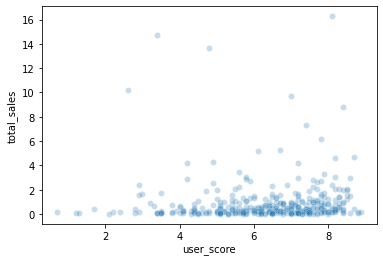

In [70]:
sns.scatterplot(data = x_360, x='user_score',y='total_sales',alpha=.25)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

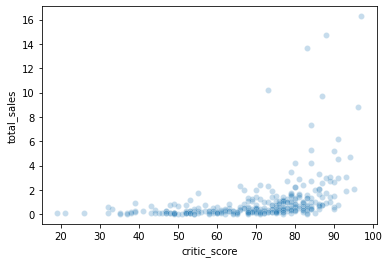

In [71]:
sns.scatterplot(data= x_360, x='critic_score',y='total_sales',alpha=.25)

In [72]:
ps4= df_final[df_final['platform']=='PS4']
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

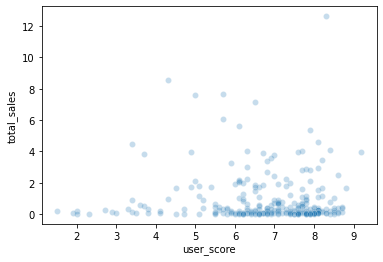

In [73]:
sns.scatterplot(data=ps4, x='user_score',y='total_sales',alpha=.25)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

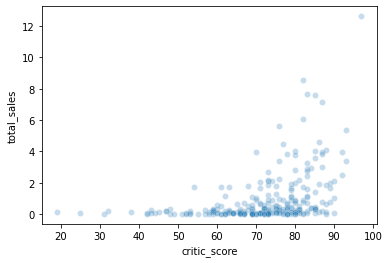

In [74]:
sns.scatterplot(data=ps4, x='critic_score',y='total_sales',alpha=.25)

In [75]:
ds = df_final[df_final['platform']=='3DS']
ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16653,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

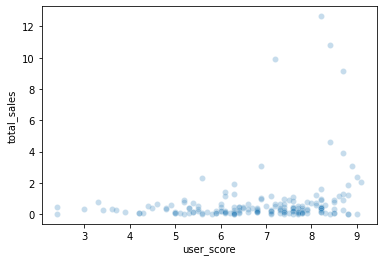

In [76]:
sns.scatterplot(data=ds, x='user_score',y='total_sales',alpha=.25)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

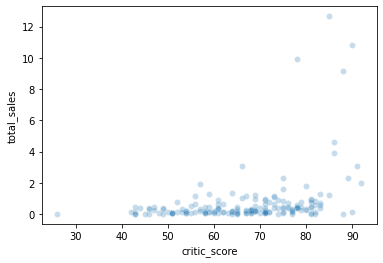

In [77]:
sns.scatterplot(data=ds, x='critic_score',y='total_sales',alpha=.25)

In [78]:
xone = df_final[df_final['platform']=='XOne']
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

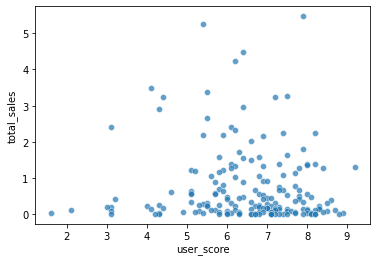

In [79]:
sns.scatterplot(data=xone, x='user_score',y='total_sales',alpha=.7)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

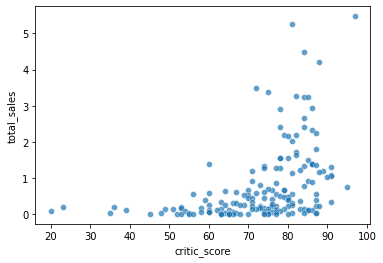

In [80]:
sns.scatterplot(data=xone, x='critic_score',y='total_sales',alpha=.7)

**Kesimpulan Scatterplot**<br>
Tidak ada korelasi yang jelas antara total_sales dengan user_score maupun critic_score<br>
karena grafik scatter plot cenderung mendekati angka 0

In [81]:
#Buat pivot table untuk game yang ada di beberapa platform

In [82]:
GTAV = df_final[df_final['name']=='Grand Theft Auto V']
GTAV

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [83]:
Cod_blackops = df_final[df_final['name']=='Call of Duty: Black Ops 3']
Cod_blackops

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,unknown,1.70
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,unknown,1.69
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,unknown,0.26


In [84]:
Fallout4 = df_final[df_final['name']=='Fallout 4']
Fallout4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.00,0.10,84.0,5.4,M,1.28


**Kesimpulan Sementara**<br>
Game yang sama di platform yang berbeda memiliki total penjualan yang berbeda

In [85]:
df_final.pivot_table(index='genre',values='total_sales',aggfunc='mean')

,total_sales
genre,
Action,0.440031
Adventure,0.109346
Fighting,0.420755
Misc,0.373942
Platform,0.724878
Puzzle,0.138889
Racing,0.487541
Role-Playing,0.524478
Shooter,1.218218


**Kesimpulan Sementara**<br>
Genre game yang paling menguntungkan adalah game yang ber genre Action sementara<br>
game yang memiliki rata-rata sales terendah ber genre Strategy

**Variasi Pangsa Pasar 5 platform teratas**

In [86]:
def sales_platform_area(area):
    df_area = df_final.groupby('platform')[area].sum().reset_index().sort_values(by=area,ascending=False)
    df_area['market_share'] = (df_area[area]/df_area[area].sum())*100
    return df_area.head()

In [87]:
#NA
check_na = sales_platform_area('na_sales')
check_na

,platform,na_sales,market_share
10,X360,226.80,27.191962
4,PS3,171.62,20.576211
5,PS4,108.74,13.037275
11,XOne,93.12,11.164531
0,3DS,83.49,10.009951


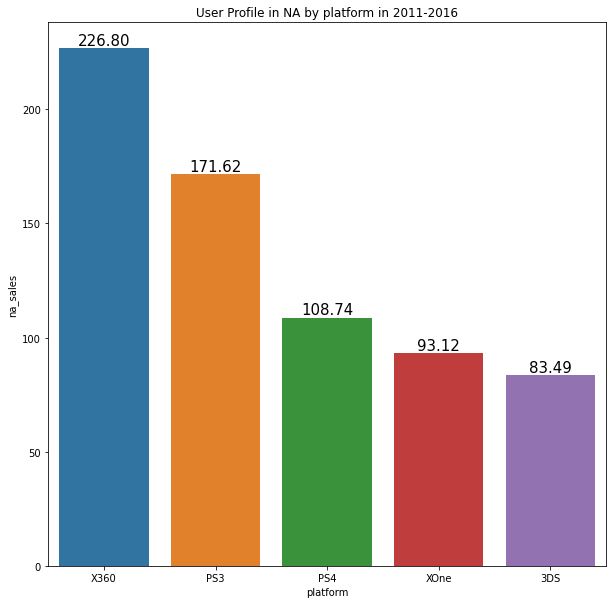

In [88]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='platform',y='na_sales', data=check_na)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in NA by platform in 2011-2016')
plt.xlabel('platform')
plt.ylabel('na_sales')
plt.show()

In [89]:
#EU
check_eu = sales_platform_area('eu_sales')
check_eu

,platform,eu_sales,market_share
4,PS3,166.18,24.687653
5,PS4,141.09,20.960290
10,X360,117.10,17.396342
0,3DS,61.48,9.133451
2,PC,56.70,8.423336


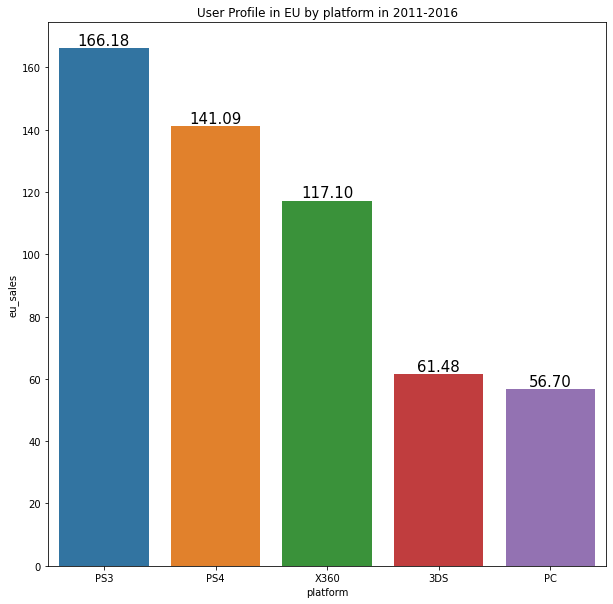

In [90]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='platform',y='eu_sales', data=check_eu)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in EU by platform in 2011-2016')
plt.xlabel('platform')
plt.ylabel('eu_sales')
plt.show()

In [91]:
#JP
check_jp = sales_platform_area('jp_sales')
check_jp

,platform,jp_sales,market_share
0,3DS,100.67,40.831474
4,PS3,50.17,20.348814
6,PSP,24.04,9.750558
7,PSV,21.91,8.886636
5,PS4,15.96,6.473332


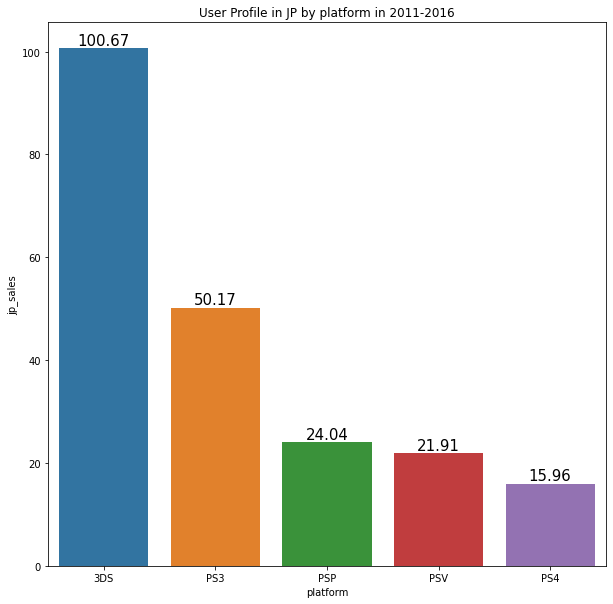

In [92]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='platform',y='jp_sales', data=check_jp)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in JP by platform in 2011-2016')
plt.xlabel('platform')
plt.ylabel('jp_sales')
plt.show()

**Kesimpulan Pangsa Pasar**<br>
Market share paling besar di NA (North America) adalah XBOX360<br>
Market share paling besar di EU (Europe) adalah PS3<br>
Market share paling besar di JP (Japan) adalah Nintendo 3DS

In [93]:
def genre_platform_area(area):
    df_genre = df_final.groupby('genre')[area].sum().reset_index().sort_values(by=area,ascending=False)
    df_genre['market_share'] = (df_genre[area]/df_genre[area].sum())*100
    return df_genre.head()

In [94]:
genre_na = genre_platform_area('na_sales')
genre_na

,genre,na_sales,market_share
0,Action,232.44,27.868165
8,Shooter,194.64,23.336171
10,Sports,108.86,13.051662
7,Role-Playing,83.89,10.057909
3,Misc,70.93,8.504082


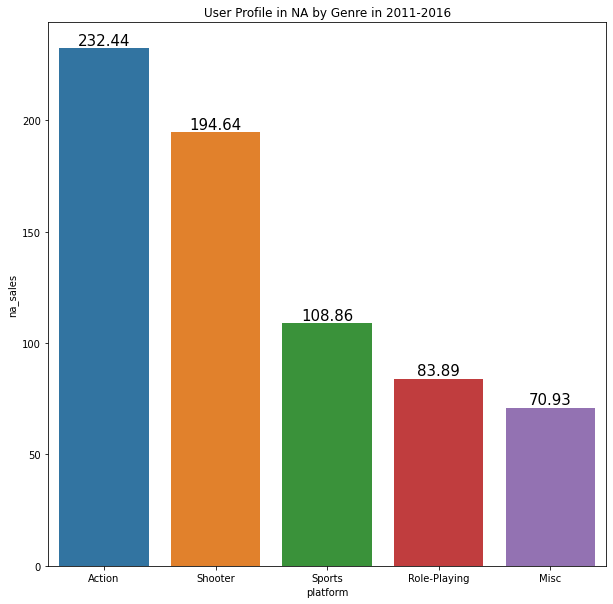

In [95]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='genre',y='na_sales', data=genre_na)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in NA by Genre in 2011-2016')
plt.xlabel('platform')
plt.ylabel('na_sales')
plt.show()

In [96]:
genre_eu = genre_platform_area('eu_sales')
genre_eu

,genre,eu_sales,market_share
0,Action,200.57,29.796622
8,Shooter,148.08,21.998722
10,Sports,88.83,13.196559
7,Role-Playing,62.35,9.262698
6,Racing,41.06,6.099862


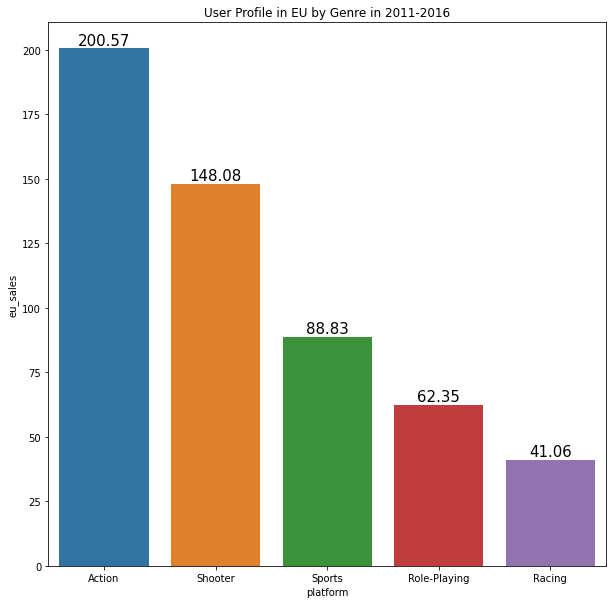

In [97]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='genre',y='eu_sales', data=genre_eu)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in EU by Genre in 2011-2016')
plt.xlabel('platform')
plt.ylabel('eu_sales')
plt.show()

In [98]:
genre_jp = genre_platform_area('jp_sales')
genre_jp

,genre,jp_sales,market_share
7,Role-Playing,80.03,32.459947
0,Action,64.26,26.063679
3,Misc,17.60,7.138511
2,Fighting,12.38,5.021294
4,Platform,12.13,4.919895


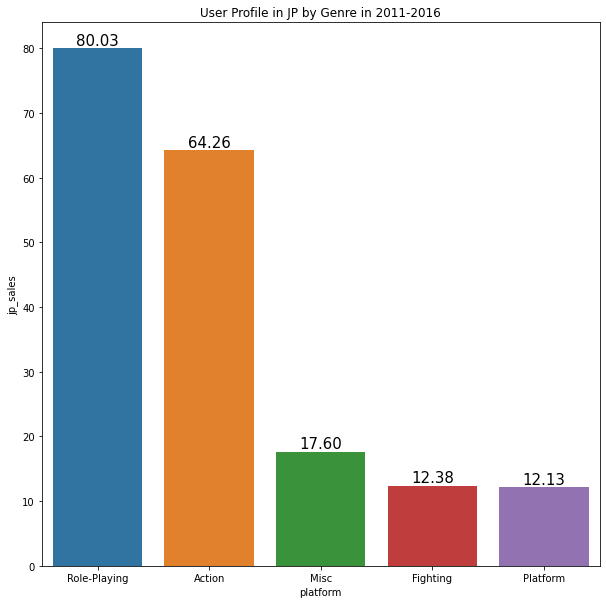

In [99]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='genre',y='jp_sales', data=genre_jp)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in JP by Genre in 2011-2016')
plt.xlabel('platform')
plt.ylabel('jp_sales')
plt.show()

**Kesimpulan Genre Area**<br>
5 Genre teratas North America : Action, Shooter, Sports,Role-playing, Misc<br>
5 Genre teratas Europe: Action, Shooter, Sports, Role-playing, Racing<br>
5 Genre teratas Japan: Role-playing, Action, Misc, Fighting, Platform

In [100]:
def rating_platform_area(area):
    df_rating = df_final.groupby('rating')[area].sum().reset_index().sort_values(by=area,ascending=False)
    df_rating['market_share'] = (df_rating[area]/df_rating[area].sum())*100
    return df_rating.head()

In [101]:
rating_na = rating_platform_area('na_sales')
rating_na

,rating,na_sales,market_share
3,M,309.33,37.086815
0,E,170.58,20.451521
6,unknown,124.07,14.875250
1,E10+,118.34,14.188258
5,T,111.33,13.347801


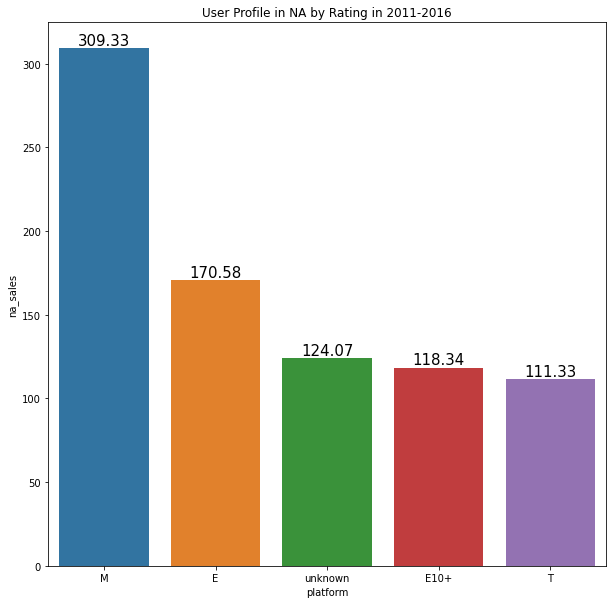

In [102]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='rating',y='na_sales', data=rating_na)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in NA by Rating in 2011-2016')
plt.xlabel('platform')
plt.ylabel('na_sales')
plt.show()

In [103]:
rating_eu = rating_platform_area('eu_sales')
rating_eu

,rating,eu_sales,market_share
3,M,251.01,37.289974
0,E,141.94,21.086566
6,unknown,116.94,17.372573
5,T,84.13,12.498329
1,E10+,79.08,11.748102


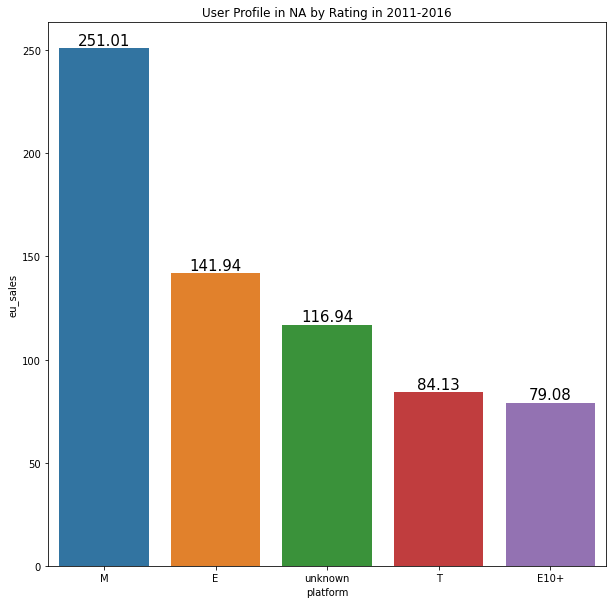

In [104]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='rating',y='eu_sales', data=rating_eu)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in NA by Rating in 2011-2016')
plt.xlabel('platform')
plt.ylabel('eu_sales')
plt.show()

In [105]:
rating_jp = rating_platform_area('jp_sales')
rating_jp

,rating,jp_sales,market_share
6,unknown,138.35,56.114378
0,E,36.68,14.877307
5,T,33.50,13.587508
3,M,26.79,10.865950
1,E10+,11.23,4.554857


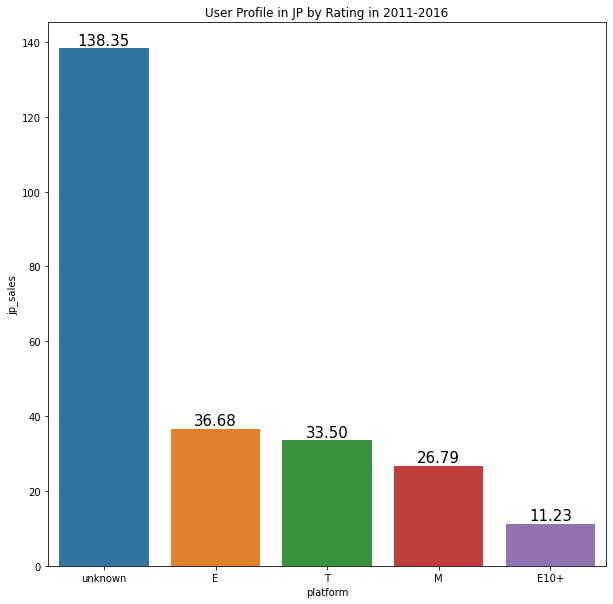

In [106]:
plt.figure(figsize=(10,10))
plots = sns.barplot(x='rating',y='jp_sales', data=rating_jp)
for g in plots.patches:
    plots.annotate(format(g.get_height(), '.2f'),
                  (g.get_x() +g.get_width()/ 2.,
                  g.get_height()), ha='center', va='center',
                  size=15, xytext = (0, 8),
                  textcoords='offset points')
plt.title('User Profile in JP by Rating in 2011-2016')
plt.xlabel('platform')
plt.ylabel('jp_sales')
plt.show()

**Kesimpulan Sementara** <br>
Penjualan game dengan rating M (Mature) memiliki penjualan tertinggi pada NA dan EU, sementara untuk wilayah JP rating unknown<br>
atau game dengan genre yang tidak diketahui memiliki penjualan tertinggi pertama dan diikuti oleh E (Everyone)

##  Hipotesis Testing

### Menguji Hipotesis

**Hipotesis pertama: Rata-rata rating pengguna platform Xbox One dan PC adalah sama**

H0: Rata-rata rating pengguna platform Xbox One dan PC adalah sama<br>
H1: Rata-rata rating pengguna platform Xbox One dan PC berbeda

In [107]:
df = df.dropna(subset=['user_score'])

In [108]:
platform_xone = df.query('platform in("XOne")')
platform_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01


In [109]:
platform_pc = df.query('platform in("PC")')
platform_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T,4.83
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.00,96.0,9.1,M,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [110]:
#Create a sample for levene test
sample_1 = platform_xone['user_score']
sample_2 = platform_pc['user_score']

In [111]:
#levene test
st.levene(sample_1, sample_2)

LeveneResult(statistic=1.2212506384014863, pvalue=0.2693951512047048)

**Kesimpulan**<br>
Pernyataan Rata-rata rating pengguna platform Xbox One dan PC adalah sama dinyatakan BENAR

In [112]:
#ttest untuk sample 1 dan 2
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak Hipotesis Nol')
else :
    print('Kita menerima Hipotesis Nol')

p-value: 1.3896435533548819e-05
Kita menolak Hipotesis Nol


**Kesimpulan ttest untuk sample 1 dan 2**<br>
Berdasarkan ttest sample 1 dan sample 2 <br>
pernyataan H0: Rata-rata rating pengguna platform Xbox One dan PC adalah sama dinyatakan SALAH

**Hipotesis ke dua: Rata rata rating pengguna genre Action dan Sports berbeda**

H0: Rata rata rating pengguna genre Action dan Sports berbeda<br>
H1: Rata rata rating pengguna genre Action dan Sports sama

In [113]:
# Create a sample for levene test
sample_3 = df.loc[df['genre'] == 'Action', 'user_score']
sample_4 = df.loc[df['genre'] == 'Sports', 'user_score']

In [114]:
# Levene test
st.levene(sample_3, sample_4)

LeveneResult(statistic=14.132896085177192, pvalue=0.0001736640672727649)

**Kesimpulan levene test sample 3 dan 4**<br>
Karena p-value < alpha maka H0 atau Rata rata rating pengguna genre Action dan Sports berbeda dinyatakan SALAH

In [115]:
# ttest_ind for sample 3 and 4
alpha = 0.05

results = st.ttest_ind(sample_3, sample_4, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.11483818791498286
Kita tidak dapat menolak hipotesis nol


**Kesimpulan ttest sample 3 dan 4**<br>
H1 atau Rata rata rating pengguna genre Action dan Sports sama adalah BENAR

### Menguji Hipotesis untuk data yang relevan 2011-2016

**Hipotesis Pertama 2011-2016**

H0: Rata-rata rating pengguna Xbox One dan PC sama<br>
H1: Rata-rata rating pengguna xbox One dan PC berbeda

In [116]:
fill_data = df_final.copy()

In [117]:
fill_data = df_final.dropna(subset=['user_score'])

In [118]:
#Query Xbox One 2011-2016
new_platform_xone = fill_data.query('platform in ("XOne")')
new_platform_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01


In [119]:
# Query PC 2011-2016
new_platform_pc = fill_data.query('platform in ("PC")')
new_platform_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,M,3.88
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
480,Star Wars: The Old Republic,PC,2011,Role-Playing,1.58,1.01,0.0,0.38,85.0,5.9,T,2.97
538,Battlefield 3,PC,2011,Shooter,0.89,1.43,0.0,0.46,89.0,7.5,M,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
16584,Transformers: Fall of Cybertron,PC,2012,Action,0.01,0.00,0.0,0.00,78.0,7.9,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.0,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.0,0.00,61.0,5.8,T,0.01


In [120]:
# Create a sample for levene test
sample_5 = new_platform_xone['user_score']
sample_6 = new_platform_pc['user_score']

In [121]:
# Levene test
st.levene(sample_5, sample_6)

LeveneResult(statistic=5.516327585628806, pvalue=0.019238606822499546)

Dikarenakan p-value < dari critical value (alpha = 0.05) maka kita tida bisa menolak H0 <br>
dan kedua sampel dianggap memiliki varians yang berbeda (equal_var = False)

**Kesimpulan levene test 2011-2016 sample 5 dan 6**<br>
H0: Rata rata rating pengguna Xbox One dan PC adalah sama dinyatakan BENAR

In [122]:
# ttest_ind for sample 5 and 6
alpha = 0.05

results = st.ttest_ind(sample_5, sample_6, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.6130712247638477
Kita tidak dapat menolak hipotesis nol


**Kesimpulan ttest 2011-2016 sample 5 dan 6**<br>
H0: Rata rata rating pengguna Xbox One dan PC adalah sama dinyatakan BENAR

**Hipotesis ke dua 2011-2016**

H0: Rata-rata rating pengguna genre Action dan Sports berbeda<br>
H1: Rata-rata rating pengguna genre Action dan Sports sama

In [123]:
# Create a sample for levene test
sample_7 = fill_data.loc[fill_data['genre'] == 'Action', 'user_score']
sample_8 = fill_data.loc[fill_data['genre'] == 'Sports', 'user_score']

In [124]:
# Levene test
st.levene(sample_7, sample_8)

LeveneResult(statistic=19.00725647931513, pvalue=1.4497763498209219e-05)

**Kesimpulan levene 2011-2016 sample 7 dan 8**<br>
Karena P-value < alpha maka H0  dinyatakan SALAH atau H0 tidak dapat diterima

In [125]:
# ttest_ind for sample 7 and 8
alpha = 0.05

results = st.ttest_ind(sample_7, sample_8, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  5.774852186972399e-19
Kita menolak hipotesis nol


**Kesimpulan**<br>
Pada Hipotesis pertama pernyataan H0 untuk 2011-2016 dinyatakan BENAR, namun untuk tahun 2011-2016<br>
Pada Hipotesis kedua pernyataan H0 untuk 2011-2016 dinyatakan SALAH untuk tahun 2011-2016

**Kesimpulan Umum**

**Pra Pemrosesan**

Pada tahap pra pemrosesan terdapat beberapa hal yang kita pelajari: <br>
    1. Data memuat hasil penjualan game dari berbagai platform <br>
    2. Data penjualan game terdiri dari berbagai tahun dan wilayah (area) <br>
    3. Pada data awal tidak terdapat data yang terduplikat <br>
    4. Data penjualan sudah ada kategori wilayah <br>
    5. Beberapa kolom memiliki Nilai yang hilang seperti `year_of_release, `rating`, `user_score`, dan `critic_score`

**Analisis Data Eksploratif** 

1. Dataframe keseluruhan 16715 game dari tahun 1980 hingga 2016 <br>
2. Game paling banyak yang dirilis ada pada tahun 2009 sebanyak 1476 game <br>
3. Game yang paling banyak  dirilis adalah game ber genre Action dan Sports <br>
4. 5 Platform dengan penjualan terbanyak sepanjang tahun adalah PS2, kemudian X360, PS3, Wii dan DS <br>
5. Penjualan PS2 tertinggi sebesar 211.81 juta dollar yaitu pada tahun 2004 <br>
6. Umum nya setiap platform memiliki kurun waktu 5 - 11 tahun untuk eksis sebelum mengalami penurunan penjualan dan dilupakan <br>
7. Market share untuk genre Action paling digemari di wilayah NA dan EU sementara untuk JP genre RPG atau Role-play lebih diminati <br>
8. Data yang dianggap relevan untuk kampanye 2017 digunakan pada data tahun 2011-2016 atau data 5 tahun terakhir <br>
9. Tidak ada korelasi yang jelas antara penilaian pengguna dan penilaian kritikus dengan penjualan game

**Hipotesis Testing**

Pada hasil Hipotesis Testing pertama untuk tahun 2011-2016 <br>
pernyataan H0: rata rata rating pengguna platform Xbox One dan PC adalah sama dinyatakan BENAR karena <br>
nilai p-value > alpha (0.05)<br>

Pada hasil Hipotesis Testing kedua untuk tahun 2011-2016 <br>
pernyataan H0: rata rata rating pengguna genre Action dan Sports berbeda adalah SALAH karena <br>
nilai p-value < alpha(0.05)